# Titanic - Kaggle Competition
Objective of this project: 
With provided dataset and target variable, to interpret and analyze dataset.
Create a robust model that can make good prediction for the given test dataset.

In [1]:
##Import libraries.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import sklearn as sk
import seaborn as sns

%matplotlib inline

In [2]:
##Import datasets.
d_train = pd.read_csv('train.csv')
d_test = pd.read_csv('test.csv')

print(d_train.info())
print(d_test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null 

In [3]:
#Merging train and test dataset for data cleaning.
df = d_train.append(d_test)
df.head()

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
0,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0.0,A/5 21171
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.0,PC 17599
2,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1.0,STON/O2. 3101282
3,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1.0,113803
4,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,0.0,373450


In [4]:
#Give a look at nulls of each column. 
df.isnull().sum()

Age             263
Cabin          1014
Embarked          2
Fare              1
Name              0
Parch             0
PassengerId       0
Pclass            0
Sex               0
SibSp             0
Survived        418
Ticket            0
dtype: int64

In [5]:
#Total columns and rows we have from original entire dataset.
print(df.shape)

(1309, 12)


In [6]:
#Number of unique value for each variable.
print(df.nunique())

Age              98
Cabin           186
Embarked          3
Fare            281
Name           1307
Parch             8
PassengerId    1309
Pclass            3
Sex               2
SibSp             7
Survived          2
Ticket          929
dtype: int64


In [7]:
##Data Cleaning

#Unique value number of 'PassengerId' is exactly same as the row number, this indicates the 'PassengerId' column
#is used as indexing in the original entire dataset. I decide to drop this column in my model.
#Dropping 'Cabin' with too much nulls in data.

#df_clean = df.copy()
df_clean = df.drop(['PassengerId', 'Cabin', 'Ticket'], axis=1)
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 9 columns):
Age         1046 non-null float64
Embarked    1307 non-null object
Fare        1308 non-null float64
Name        1309 non-null object
Parch       1309 non-null int64
Pclass      1309 non-null int64
Sex         1309 non-null object
SibSp       1309 non-null int64
Survived    891 non-null float64
dtypes: float64(3), int64(3), object(3)
memory usage: 102.3+ KB


In [8]:
#Sum of counts in each unique value of column 'Embarked'
df_clean['Embarked'].value_counts()

S    914
C    270
Q    123
Name: Embarked, dtype: int64

In [9]:
#Fill the 2 null values in 'Embarked' with 'S', since it is the majority portion values of this column.
df_clean['Embarked'].fillna('S', inplace=True)

#Fill the 1 null value in 'Fare' with its median.
df_clean['Fare'].fillna(df_clean['Fare'].median(), inplace=True)

In [10]:
df_clean.loc[df_clean['Age'].isnull()]

#The 'Age' with null data has various age condition, indicates by the title in 'Name'.
#It shows the relationship between 'Age' and 'Name', also in 'Name' variable, the title is the key contributor.

,Age,Embarked,Fare,Name,Parch,Pclass,Sex,SibSp,Survived
5,NaN,Q,8.4583,"Moran, Mr. James",0,3,male,0,0.0
17,NaN,S,13.0000,"Williams, Mr. Charles Eugene",0,2,male,0,1.0
19,NaN,C,7.2250,"Masselmani, Mrs. Fatima",0,3,female,0,1.0
26,NaN,C,7.2250,"Emir, Mr. Farred Chehab",0,3,male,0,0.0
28,NaN,Q,7.8792,"O'Dwyer, Miss. Ellen ""Nellie""",0,3,female,0,1.0
29,NaN,S,7.8958,"Todoroff, Mr. Lalio",0,3,male,0,0.0
31,NaN,C,146.5208,"Spencer, Mrs. William Augustus (Marie Eugenie)",0,1,female,1,1.0
32,NaN,Q,7.7500,"Glynn, Miss. Mary Agatha",0,3,female,0,1.0
36,NaN,C,7.2292,"Mamee, Mr. Hanna",0,3,male,0,1.0
42,NaN,C,7.8958,"Kraeff, Mr. Theodor",0,3,male,0,0.0


In [11]:
##Feature Engineering.

#Extract Titles from 'Name'.
title = []
for i in df_clean['Name']:
    title.append(i.split(', ')[1].split('.')[0])

df_clean['Title'] = title

In [12]:
df_clean['Title'].value_counts()

Mr              757
Miss            260
Mrs             197
Master           61
Dr                8
Rev               8
Col               4
Ms                2
Mlle              2
Major             2
Dona              1
Sir               1
Don               1
Jonkheer          1
Mme               1
the Countess      1
Capt              1
Lady              1
Name: Title, dtype: int64

In [13]:
#Cleaning the title with small quantities.
vips = (df_clean['Title'].value_counts() < 9)

df_clean['Title'] = df_clean['Title'].apply(lambda x: 'VIPs' if vips.loc[x] == True else x)

In [14]:
#Find out the number of nulls in each title.
df_clean.loc[df_clean['Age'].isnull()]['Title'].value_counts()

Mr        176
Miss       50
Mrs        27
Master      8
VIPs        2
Name: Title, dtype: int64

In [15]:
#Check each title group's mean of age.
age_cleaning = df_clean.loc[df_clean['Age'].notnull()]
print("Mr: ", age_cleaning.loc[age_cleaning['Title'] == 'Mr']['Age'].mean())
print("Miss: ", age_cleaning.loc[age_cleaning['Title'] == 'Miss']['Age'].mean())
print("Mrs: ", age_cleaning.loc[age_cleaning['Title'] == 'Mrs']['Age'].mean())
print("Master: ", age_cleaning.loc[age_cleaning['Title'] == 'Master']['Age'].mean())
print("All Ages: ", df_clean['Age'].median())

Mr:  32.25215146299484
Miss:  21.774238095238097
Mrs:  36.99411764705882
Master:  5.482641509433963
All Ages:  28.0


In [16]:
#Fill the nulls in 'Age' with the mean of this column.
df_clean['Age'].fillna(df_clean['Age'].median(), inplace=True)

In [17]:
#Create a column to bin the 'Age' into 5 range-bins
df_clean['Age_Bins'] = pd.cut(df_clean['Age'], 5)
print(df_clean['Age_Bins'].value_counts())

(16.136, 32.102]    787
(32.102, 48.068]    269
(0.0902, 16.136]    134
(48.068, 64.034]    106
(64.034, 80.0]       13
Name: Age_Bins, dtype: int64


In [18]:
#Create a column to bin the 'Fare' into 5 range-bins
df_clean['Fare_Bins'] = pd.qcut(df_clean['Fare'], 5)
print(df_clean['Fare_Bins'].value_counts())

(-0.001, 7.854]      275
(21.558, 41.579]     265
(41.579, 512.329]    259
(10.5, 21.558]       256
(7.854, 10.5]        254
Name: Fare_Bins, dtype: int64


In [19]:
#Create columns for family size, and whether the indiviual was travelled alone or with family member.
df_clean['Family_Size'] = df_clean['Parch'] + df_clean['SibSp'] + 1
df_clean['Travel_Alone'] = 1
df_clean['Travel_Alone'].loc[df_clean['Family_Size'] > 1] = 0

df_clean.describe()

/Users/Nicky/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:179: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


,Age,Fare,Parch,Pclass,SibSp,Survived,Family_Size,Travel_Alone
count,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,891.000000,1309.000000,1309.000000
mean,29.503186,33.281086,0.385027,2.294882,0.498854,0.383838,1.883881,0.603514
std,12.905241,51.741500,0.865560,0.837836,1.041658,0.486592,1.583639,0.489354
min,0.170000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000
25%,22.000000,7.895800,0.000000,2.000000,0.000000,0.000000,1.000000,0.000000
50%,28.000000,14.454200,0.000000,3.000000,0.000000,0.000000,1.000000,1.000000
75%,35.000000,31.275000,0.000000,3.000000,1.000000,1.000000,2.000000,1.000000
max,80.000000,512.329200,9.000000,3.000000,8.000000,1.000000,11.000000,1.000000


In [20]:
##Data Analysis and exploratory.
df_clean = df_clean.drop(['Name'], axis=1)

df_analysis = df_clean[:890]
target_analysis = df_analysis['Survived']

for i in df_analysis:
    if df_analysis[i].dtype != 'float64' :
        print('Survival Correlation by:', i)
        print(target_analysis.groupby(df_analysis[i]).mean())
        print('\n')
        print('-'*8)
        

Survival Correlation by: Embarked
Embarked
C    0.553571
Q    0.394737
S    0.339009
Name: Survived, dtype: float64


--------
Survival Correlation by: Parch
Parch
0    0.344165
1    0.550847
2    0.500000
3    0.600000
4    0.000000
5    0.200000
6    0.000000
Name: Survived, dtype: float64


--------
Survival Correlation by: Pclass
Pclass
1    0.629630
2    0.472826
3    0.242857
Name: Survived, dtype: float64


--------
Survival Correlation by: Sex
Sex
female    0.742038
male      0.189236
Name: Survived, dtype: float64


--------
Survival Correlation by: SibSp
SibSp
0    0.345964
1    0.535885
2    0.464286
3    0.250000
4    0.166667
5    0.000000
8    0.000000
Name: Survived, dtype: float64


--------
Survival Correlation by: Title
Title
Master    0.575000
Miss      0.697802
Mr        0.156977
Mrs       0.792000
VIPs      0.444444
Name: Survived, dtype: float64


--------
Survival Correlation by: Age_Bins
Age_Bins
(0.0902, 16.136]    0.550000
(16.136, 32.102]    0.344828
(32.102,

/Users/Nicky/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:57: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


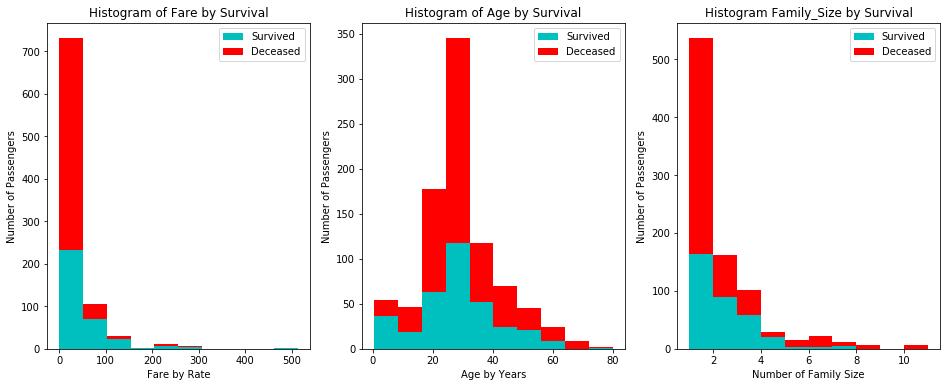

In [24]:
#Data Visualization
plt.figure(figsize=[16,6])

plt.subplot(131)
plt.hist(x = [df_analysis[target_analysis ==1]['Fare'], df_analysis[target_analysis ==0]['Fare']], 
         stacked=True, color = ['c','r'], label = ['Survived','Deceased'])
plt.title('Histogram of Fare by Survival')
plt.xlabel('Fare by Rate')
plt.ylabel('Number of Passengers')
plt.legend()

plt.subplot(132)
plt.hist(x = [df_analysis[target_analysis ==1]['Age'], df_analysis[target_analysis ==0]['Age']], 
         stacked=True, color = ['c','r'], label = ['Survived','Deceased'])
plt.title('Histogram of Age by Survival')
plt.xlabel('Age by Years')
plt.ylabel('Number of Passengers')
plt.legend()

plt.subplot(133)
plt.hist(x = [df_analysis[target_analysis ==1]['Family_Size'], df_analysis[target_analysis ==0]['Family_Size']], 
         stacked=True, color = ['c','r'], label = ['Survived','Deceased'])
plt.title('Histogram Family_Size by Survival')
plt.xlabel('Number of Family Size')
plt.ylabel('Number of Passengers')
plt.legend()

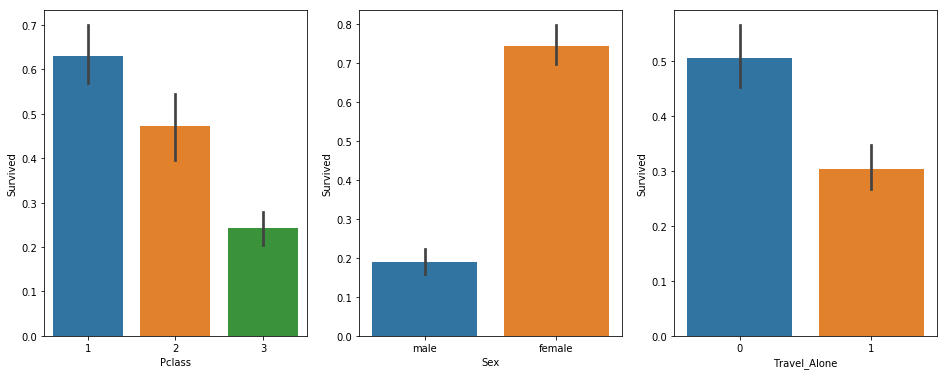

In [22]:
fig, saxis = plt.subplots(1, 3,figsize=(16,6))

sns.barplot(x = df_analysis['Pclass'], y = target_analysis, data=df_analysis, ax = saxis[0])
sns.barplot(x = df_analysis['Sex'], y = target_analysis, data=df_analysis, ax = saxis[1])
sns.barplot(x = df_analysis['Travel_Alone'], y = target_analysis, data=df_analysis, ax = saxis[2])


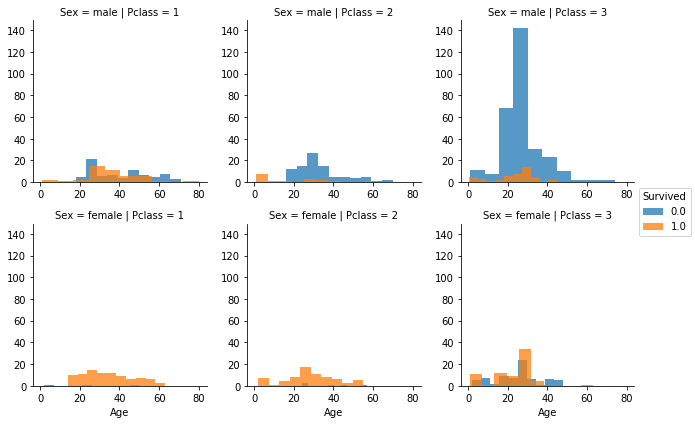

In [26]:
#histogram comparison of sex, class, and age by survival
h = sns.FacetGrid(df_analysis, row = 'Sex', col = 'Pclass', hue = 'Survived')
h.map(plt.hist, 'Age', alpha = .75)
h.add_legend()

In [27]:
#Convert catergorical datas into encoded/dummified by using dummies from pandas.

df_clean = df_clean.drop(['Parch', 'SibSp'], axis=1)
df_ready = pd.get_dummies(df_clean, drop_first=True)
df_ready.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 21 columns):
Age                            1309 non-null float64
Fare                           1309 non-null float64
Pclass                         1309 non-null int64
Survived                       891 non-null float64
Family_Size                    1309 non-null int64
Travel_Alone                   1309 non-null int64
Embarked_Q                     1309 non-null uint8
Embarked_S                     1309 non-null uint8
Sex_male                       1309 non-null uint8
Title_Miss                     1309 non-null uint8
Title_Mr                       1309 non-null uint8
Title_Mrs                      1309 non-null uint8
Title_VIPs                     1309 non-null uint8
Age_Bins_(16.136, 32.102]      1309 non-null uint8
Age_Bins_(32.102, 48.068]      1309 non-null uint8
Age_Bins_(48.068, 64.034]      1309 non-null uint8
Age_Bins_(64.034, 80.0]        1309 non-null uint8
Fare_Bins_(7.854, 10.5

In [28]:
#Modeling

from sklearn.model_selection import train_test_split

df_ready_train = df_ready[:890]

y = df_ready_train.Survived
x = df_ready_train.drop('Survived', axis=1)

x_btrain, x_btest, y_btrain, y_btest = train_test_split(x, y, test_size=0.20, random_state = 51)

In [29]:
##Logistics Regression

from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
model_lr = lr.fit(x_btrain, y_btrain)

lr_prediction = model_lr.predict(x_btest)
lr_prediction

array([ 1.,  1.,  1.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  1.,  1.,  0.,
        1.,  0.,  0.,  0.,  1.,  1.,  1.,  0.,  0.,  0.,  0.,  1.,  0.,
        0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,
        1.,  0.,  1.,  1.,  1.,  0.,  0.,  1.,  0.,  0.,  0.,  1.,  0.,
        0.,  1.,  1.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  1.,  0.,  0.,
        0.,  0.,  0.,  0.,  1.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  1.,
        0.,  1.,  0.,  1.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  1.,  0.,  0.,  1.,  1.,  1.,  0.,  1.,  1.,  0.,  1.,
        1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,
        1.,  0.,  1.,  1.,  0.,  1.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,
        0.,  1.,  1.,  1.,  1.,  0.,  0.,  0.,  1.,  0.,  1.,  0.,  1.,
        0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,
        1.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  1.,  0.,  1.,
        1.,  1.,  1.,  0.,  0.,  1.,  1.,  1.,  0.])

In [30]:
#Evaluation
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score

print(accuracy_score(y_btest, lr_prediction))
print(recall_score(y_btest, lr_prediction))
print(f1_score(y_btest, lr_prediction))
print(precision_score(y_btest, lr_prediction))


0.848314606742
0.733333333333
0.802919708029
0.887096774194


In [31]:
##Random Forest Classifier

from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators=23)
model_rfc = rfc.fit(x_btrain, y_btrain)

rfc_prediction = model_rfc.predict(x_btest)

print(accuracy_score(y_btest, rfc_prediction))
print(recall_score(y_btest, rfc_prediction))
print(f1_score(y_btest, rfc_prediction))
print(precision_score(y_btest, rfc_prediction))

0.820224719101
0.773333333333
0.783783783784
0.794520547945


In [32]:
##Gradient Boosting Classifier

from sklearn.ensemble import GradientBoostingClassifier

gbc = GradientBoostingClassifier(n_estimators = 23)
model_gbc = gbc.fit(x_btrain, y_btrain)

gbc_prediction = model_gbc.predict(x_btest)

print(accuracy_score(y_btest, gbc_prediction))
print(recall_score(y_btest, gbc_prediction))
print(f1_score(y_btest, gbc_prediction))
print(precision_score(y_btest, gbc_prediction))

0.792134831461
0.586666666667
0.704
0.88


In [33]:
#Prepare prediction on 'test' dataset.

df_subm_train = df_ready[:891]
df_subm = df_ready[891:]

y_subm_train = df_subm_train.Survived
x_subm_train = df_subm_train.drop('Survived', axis=1)

y_subm = df_subm.Survived
x_subm = df_subm.drop('Survived', axis=1)


In [35]:
#Choosing Gradient Boosting Classifier for training model.

model_gbc = gbc.fit(x_subm_train, y_subm_train)
gbc_prediction = model_gbc.predict(x_subm)
gbc_prediction = gbc_prediction.astype(int)
print(gbc_prediction)

[0 0 0 0 0 0 1 0 1 0 0 0 1 0 1 1 0 0 1 1 0 1 1 0 1 0 1 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 1 1 0 0 0 1 1 0 0 1 1 0 0 0 0 0 1 0 0 0 1 1 1 1 0 0 1 1 0 1 0
 1 0 0 1 0 1 1 0 0 0 0 0 1 0 1 1 0 0 1 0 0 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0
 1 1 1 1 0 0 1 0 1 1 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 0 1 0 0 0 0 0 1 1 0 0 1 1 1 0 0 1 0 0 1 0 0 0 0 0 0 1 1 0 1 1 0 0 1 0 1
 0 1 0 0 0 0 0 1 0 1 0 1 1 0 0 1 1 1 1 0 0 1 0 1 0 0 0 0 1 1 0 1 0 1 0 1 0
 1 0 1 1 0 1 0 0 0 1 0 0 0 0 0 0 1 1 1 1 0 0 0 0 1 0 1 1 1 0 0 0 0 0 0 0 1
 0 0 0 1 1 0 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 1 1 1 1 0 0 0 0 0 0 1 0 1 0 0
 1 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0
 1 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 1 1 0 0 0 1 0 1 0 0 1 0 1 1 0 1 0 0 0 1 0
 0 1 0 0 1 1 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 1 0 0 1 0 1 0 0 1 0 1 0 0 0 0
 0 1 1 1 1 1 0 1 0 0 0]


In [ ]:
##With above model prediction, I entered the top 23% in the competition.